In [80]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpmath import mp
from IPython.display import display, Math
from helper_funcs import *

mp.dps = 100

In [81]:
def g(x):
    return np.sin(x)

def generate_points(q, m):
    a = np.random.uniform(-q, q, m)
    b = g(a)
    return a, b

def phi(x, t, n):
    return sum([x[i] * t**i for i in range(n+1)])

def solve_least_squares(q, m, n, num_iter=100000, alpha=0.1, tol=1e-4):
    a, b = generate_points(q, m)

    def func(x):
        return sum((phi(x, a[j], n) - b[j])**2 for j in range(m))
    
    def gradient(x):
        return np.array([2*sum((phi(x, a[j], n) - b[j]) * (a[j]**i) for j in range(m)) for i in range(n+1)])
    
    def hessian(x):
        return np.array([[2*sum((phi(x, a[j], n) - b[j]) * (a[j]**i) * (a[j]**k) + (a[j] ** (i+k)) for j in range(m)) for i in range(n+1)] for k in range(n+1)])
    
    x_0 = np.zeros(n+1)
    #x_0 = np.full(n+1, 0.5)

    x, f = descent(func, gradient, p, x_0, alpha, num_iter, method='newton', hessian=hessian, tol=tol)

    return x, f

In [82]:
# q, m, n, num_iter
problems = [(np.pi, 100, 3, 1000), (2*np.pi, 100, 3, 100), (np.pi/2, 100, 4, 100), (np.pi, 100, 5, 100), (2*np.pi, 100, 6, 100)]

for i, problem in enumerate(problems):
    q, m, n, num_iter = problem
    display(Math(f'\\text{{Problem {i+1}:}}'))
    display(Math(f'g(x) = \sin(x) \\text{{ approximate with a polyn. of degree }} {n} \\text{{ on interval: }} [-{q}, {q}]'))
    display(Math(f'\\text{{The polynomial is:}}'))
    display(Math(f'\\phi (x; t) = ' + ' + '.join([f'x_{i}t^{i}' for i in range(n+1)])))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [83]:
for i, problem in enumerate(problems):
    print(f'\nSolution for problem {i+1}...')
    x, f = solve_least_squares(*problem)
    print(f'Parameters: {x}')
    print(f'Function values are: {f}')


Solution for problem 1...
Stopping criterion (0.0001) reached at iteration 153
Parameters: [array([0., 0., 0., 0.]), array([ 0.11382704,  0.18286761, -0.00487023, -0.02128195]), array([ 0.13934661,  0.2614585 , -0.00567446, -0.03002013]), array([ 0.15136684,  0.32218242, -0.00599698, -0.03666917]), array([ 0.15645118,  0.37275761, -0.00609707, -0.04214781]), array([ 0.1573387 ,  0.41642653, -0.0060727 , -0.04683914]), array([ 0.15549432,  0.45493423, -0.00597203, -0.05094812]), array([ 0.15181012,  0.48935224, -0.00582226, -0.05459999]), array([ 0.14687487,  0.52039679, -0.00564021, -0.05787807]), array([ 0.14109871,  0.54857649, -0.00543693, -0.06084128]), array([ 0.13477814,  0.57426973, -0.00522005, -0.06353329]), array([ 0.12813312,  0.59776886, -0.00499499, -0.06598765]), array([ 0.12132962,  0.619307  , -0.00476575, -0.06823101]), array([ 0.11449412,  0.63907524, -0.0045353 , -0.07028506]), array([ 0.10772328,  0.65723396, -0.00430593, -0.07216793]), array([ 0.10109081,  0.67392

Stopping criterion (0.0001) reached at iteration 152


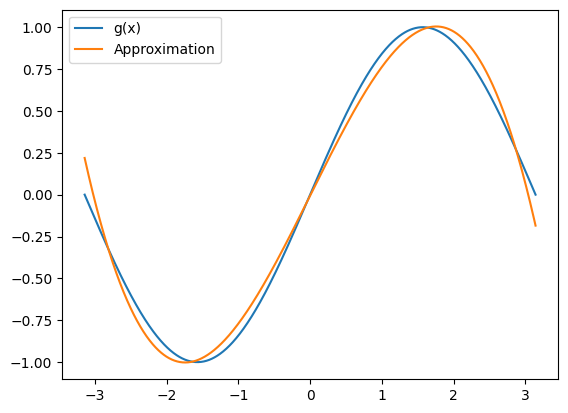

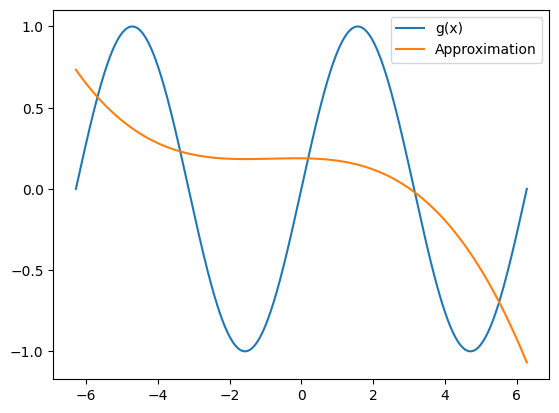

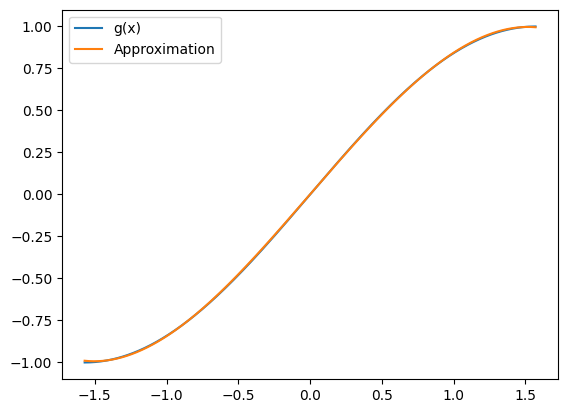

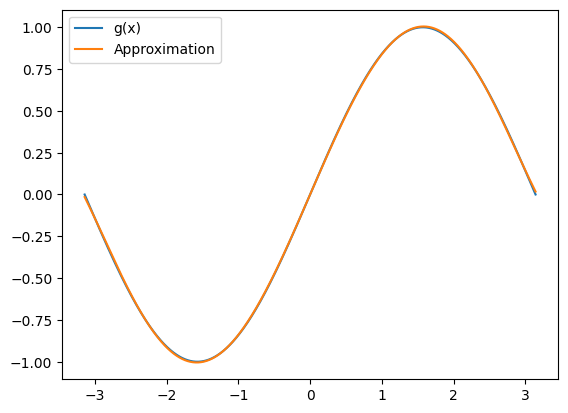

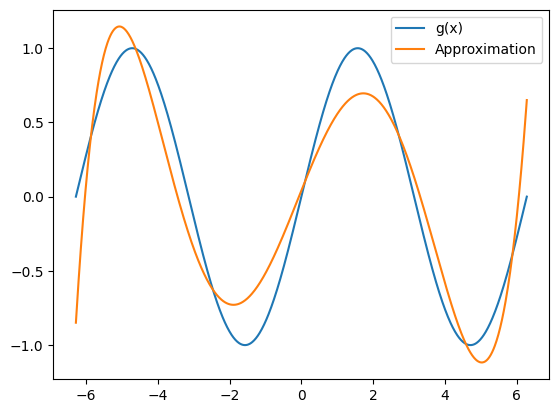

In [79]:
for i, problem in enumerate(problems):
    q, m, n, num_iter = problem
    x, f = solve_least_squares(q, m, n, num_iter)

    x_values = np.linspace(-q, q, 1000)
    y_true = g(x_values)
    y_approx = [phi(x[-1], t, n) for t in x_values]

    plt.figure(i)
    plt.plot(x_values, y_true, label='g(x)')
    plt.plot(x_values, y_approx, label='Approximation')
    plt.legend()
plt.show()